 ##Data Management Notebook for Open Acess

###Importing libraries:

In [2]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install mpld3
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


###The number of immigrants currently active and inactive
####employed persons and job-seekers

In [2]:
df_act = pd.read_csv("https://raw.githubusercontent.com/openaccesstoimmigrants/openaccesstoimmigrants/main/_datasets/ISTAT_Active_Foreigners%5B2018-2022%5D.csv", sep=",")

df2 = df_act[["Gender", "Age class", "Highest level of education attained", "TIME", "Value"]]

act_females = df2[df2["Gender"] == 'females']

act_females['TIME'] = act_females['TIME'].astype('str')
mask = (act_females['TIME'].str.len() == 4)
act_females = act_females.loc[mask]

act_females_final = act_females[act_females["Highest level of education attained"] != 'total']

act_females_final.rename(columns = {'Highest level of education attained':'Education', 'TIME':'Year'}, inplace = True)
act_females_final['Year'] = act_females_final['Year'].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_8532\3948419923.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_females['TIME'] = act_females['TIME'].astype('str')
C:\Users\User\AppData\Local\Temp\ipykernel_8532\3948419923.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_females_final.rename(columns = {'Highest level of education attained':'Education', 'TIME':'Year'}, inplace = True)
C:\Users\User\AppData\Local\Temp\ipykernel_8532\3948419923.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [3]:
act_females_ed_1 = act_females_final[act_females_final["Education"]=='no educational degree, primary and lower secondary school certificate']
act_females_ed_2 = act_females_final[act_females_final["Education"]=='upper and post secondary']
act_females_ed_3 = act_females_final[act_females_final["Education"]== 'tertiary (university, doctoral and specialization courses)']

In [7]:
ed_internal_id = []

def int_id(data):
    for i, row in data.iterrows():
        ed_internal_id.append("ed-" + str(i))
        
    data['internalId'] = pd.Series(ed_internal_id)

int_id(act_females_ed_1)
int_id(act_females_ed_2)

act_females_ed_2

C:\Users\User\AppData\Local\Temp\ipykernel_8532\3091831890.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['internalId'] = pd.Series(ed_internal_id)
C:\Users\User\AppData\Local\Temp\ipykernel_8532\3091831890.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['internalId'] = pd.Series(ed_internal_id)


,Gender,Age class,Education,Year,Value,internalId
75,females,15-64 years,upper and post secondary,2018,67.333505,NaN
80,females,15-64 years,upper and post secondary,2019,65.892842,NaN
85,females,15-64 years,upper and post secondary,2020,59.762553,NaN
90,females,15-64 years,upper and post secondary,2021,62.995636,NaN
91,females,15-64 years,upper and post secondary,2022,63.102924,NaN


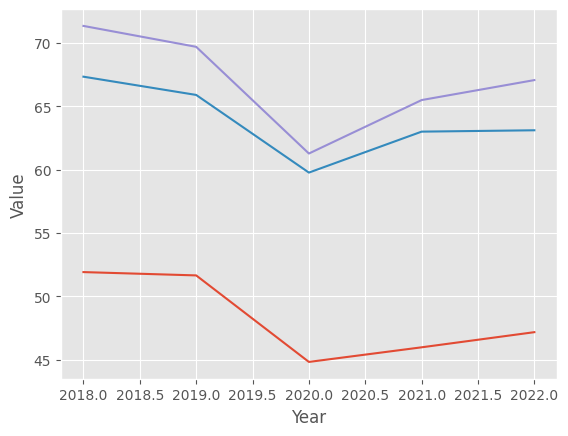

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt, mpld3
import pandas as pd
import numpy as np
plt.style.use('ggplot')

fig, ax = plt.subplots()
ax= sns.lineplot(x='Year', y='Value', data=act_females_ed_1)
ax1 = sns.lineplot(x='Year', y='Value', data=act_females_ed_2)
ax2 = sns.lineplot(x='Year', y='Value', data=act_females_ed_3)

In [12]:
import pandas as pd
import numpy as np
from bokeh.palettes import Spectral11
from bokeh.plotting import figure, show, output_file
output_file('temp.html')

toy_df = pd.DataFrame(data=np.random.rand(5,3), columns = ('a', 'b' ,'c'), index = pd.DatetimeIndex(start='01-01-2015',periods=5, freq='d'))   

numlines=len(toy_df.columns)
mypalette=Spectral11[0:numlines]

p = figure(width=500, height=300, x_axis_type="datetime") 
p.multi_line(xs=[toy_df.index.values]*numlines,
                ys=[toy_df[name].values for name in toy_df],
                line_color=mypalette,
                line_width=5)
show(p)

TypeError: DatetimeIndex.__new__() got an unexpected keyword argument 'start'

In [22]:
x = [2018, 2019, 2020, 2021, 2022]
from bokeh.plotting import figure, show
p = figure(title="Active rate", x_axis_label='x', y_axis_label='Value')
show(p)

In [5]:
ED2 = act_females_final[act_females_final["Education"] == "upper and post secondary"]
from pathlib import Path  
filepath = Path('openaccesstoimmigrants/ED2.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
ED2.to_csv(filepath)

In [31]:
act_males = df2[df2["Gender"]=='males']

act_males['TIME'] = act_males['TIME'].astype('str')
mask = (act_males['TIME'].str.len() == 4)
act_males = act_males.loc[mask]

act_males_final = act_males[act_males["Highest level of education attained"] != 'total']

act_males_final.rename(columns = {'Highest level of education attained':'Education', 'TIME':'Year'}, inplace = True)
act_females_final['Year'] = act_females_final['Year'].astype(int)

act_males_ed_1 = act_males_final[act_males_final["Education"]=='no educational degree, primary and lower secondary school certificate']
act_males_ed_2 = act_males_final[act_males_final["Education"]=='upper and post secondary']
act_males_ed_3 = act_males_final[act_males_final["Education"]== 'tertiary (university, doctoral and specialization courses)']

C:\Users\User\AppData\Local\Temp\ipykernel_8532\3079780356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_males['TIME'] = act_males['TIME'].astype('str')
C:\Users\User\AppData\Local\Temp\ipykernel_8532\3079780356.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_males_final.rename(columns = {'Highest level of education attained':'Education', 'TIME':'Year'}, inplace = True)
C:\Users\User\AppData\Local\Temp\ipykernel_8532\3079780356.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

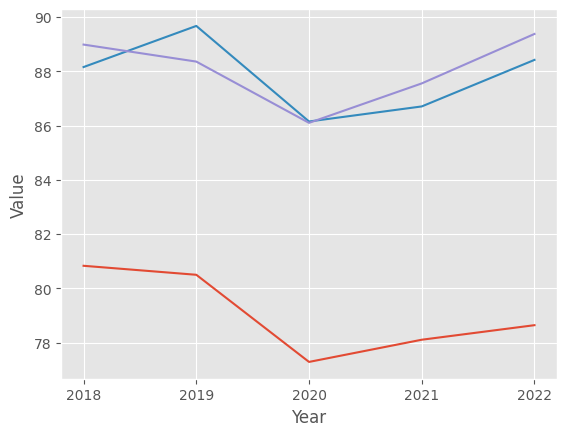

In [33]:
plt.style.use('ggplot')

fig, ax = plt.subplots()
ax= sns.lineplot(x='Year', y='Value', data=act_males_ed_1)
ax1 = sns.lineplot(x='Year', y='Value', data=act_males_ed_2)
ax2 = sns.lineplot(x='Year', y='Value', data=act_males_ed_3)

In [9]:
#from pathlib import Path  
#filepath = Path('openaccesstoimmigrants/D1.csv')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  
#merged.to_csv(filepath)  

In [18]:
df_occ = pd.read_csv("_datasets/EMP_TEMP_SEX_OCU_EDU_NB_A.csv", sep=",")

df_occ = df_occ[['ref_area', 
                 'sex',
                 'classif1',
                 'classif2',
                 'time',
                 'obs_value']].copy()

df_occ_ITA = df_occ.loc[df_occ['ref_area']=='ITA']

df_occ

C:\Users\User\AppData\Local\Temp\ipykernel_12396\3191642807.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_occ = pd.read_csv("_datasets/EMP_TEMP_SEX_OCU_EDU_NB_A.csv", sep=",")


,ref_area,sex,classif1,classif2,time,obs_value
0,AFG,SEX_T,OCU_SKILL_TOTAL,EDU_AGGREGATE_TOTAL,2021,7699.765
1,AFG,SEX_T,OCU_SKILL_TOTAL,EDU_AGGREGATE_LTB,2021,4455.287
2,AFG,SEX_T,OCU_SKILL_TOTAL,EDU_AGGREGATE_BAS,2021,1455.178
3,AFG,SEX_T,OCU_SKILL_TOTAL,EDU_AGGREGATE_INT,2021,1189.710
4,AFG,SEX_T,OCU_SKILL_TOTAL,EDU_AGGREGATE_ADV,2021,458.157
...,...,...,...,...,...,...
738773,ZWE,SEX_F,OCU_ISCO08_0,EDU_ISCED97_5,2011,NaN
738774,ZWE,SEX_F,OCU_ISCO08_X,EDU_ISCED97_TOTAL,2011,4.172
738775,ZWE,SEX_F,OCU_ISCO08_X,EDU_ISCED97_1,2011,NaN
738776,ZWE,SEX_F,OCU_ISCO08_X,EDU_ISCED97_2,2011,2.458
